In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mediacompany.csv')

In [3]:
print(df.shape)
df.head()

(80, 8)


Date  Views_show  Visitors  Views_platform  Ad_impression   
0  3/1/2017      183738   1260228         1706478     1060860448  \
1  3/2/2017      193763   1270561         1690727     1031846645   
2  3/3/2017      210479   1248183         1726157     1010867575   
3  3/4/2017      240061   1492913         1855353     1079194579   
4  3/5/2017      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  Unnamed: 7  
0                    0            0         NaN  
1                    0            0         NaN  
2                    0            0         NaN  
3                    1            0         NaN  
4                    0            0         NaN

In [4]:
df.describe()

Views_show      Visitors  Views_platform  Ad_impression   
count      80.000000  8.000000e+01    8.000000e+01   8.000000e+01  \
mean   289902.625000  1.699066e+06    2.222401e+06   1.442374e+09   
std    154924.323585  2.311571e+05    2.913510e+05   2.983186e+08   
min    102520.000000  1.248183e+06    1.690727e+06   1.010868e+09   
25%    185353.250000  1.550766e+06    2.010816e+06   1.207911e+09   
50%    235807.000000  1.698843e+06    2.226270e+06   1.385931e+09   
75%    350079.000000  1.817895e+06    2.388837e+06   1.632416e+09   
max    758631.000000  2.344650e+06    3.064422e+06   2.424203e+09   

       Cricket_match_india  Character_A  Unnamed: 7  
count            80.000000    80.000000         0.0  
mean              0.100000     0.375000         NaN  
std               0.301893     0.487177         NaN  
min               0.000000     0.000000         NaN  
25%               0.000000     0.000000         NaN  
50%               0.000000     0.000000         NaN  
75%               0.000000     1.000000         NaN  
max               1.000000     1.000000         NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 80 non-null     object 
 1   Views_show           80 non-null     int64  
 2   Visitors             80 non-null     int64  
 3   Views_platform       80 non-null     int64  
 4   Ad_impression        80 non-null     int64  
 5   Cricket_match_india  80 non-null     int64  
 6   Character_A          80 non-null     int64  
 7   Unnamed: 7           0 non-null      float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

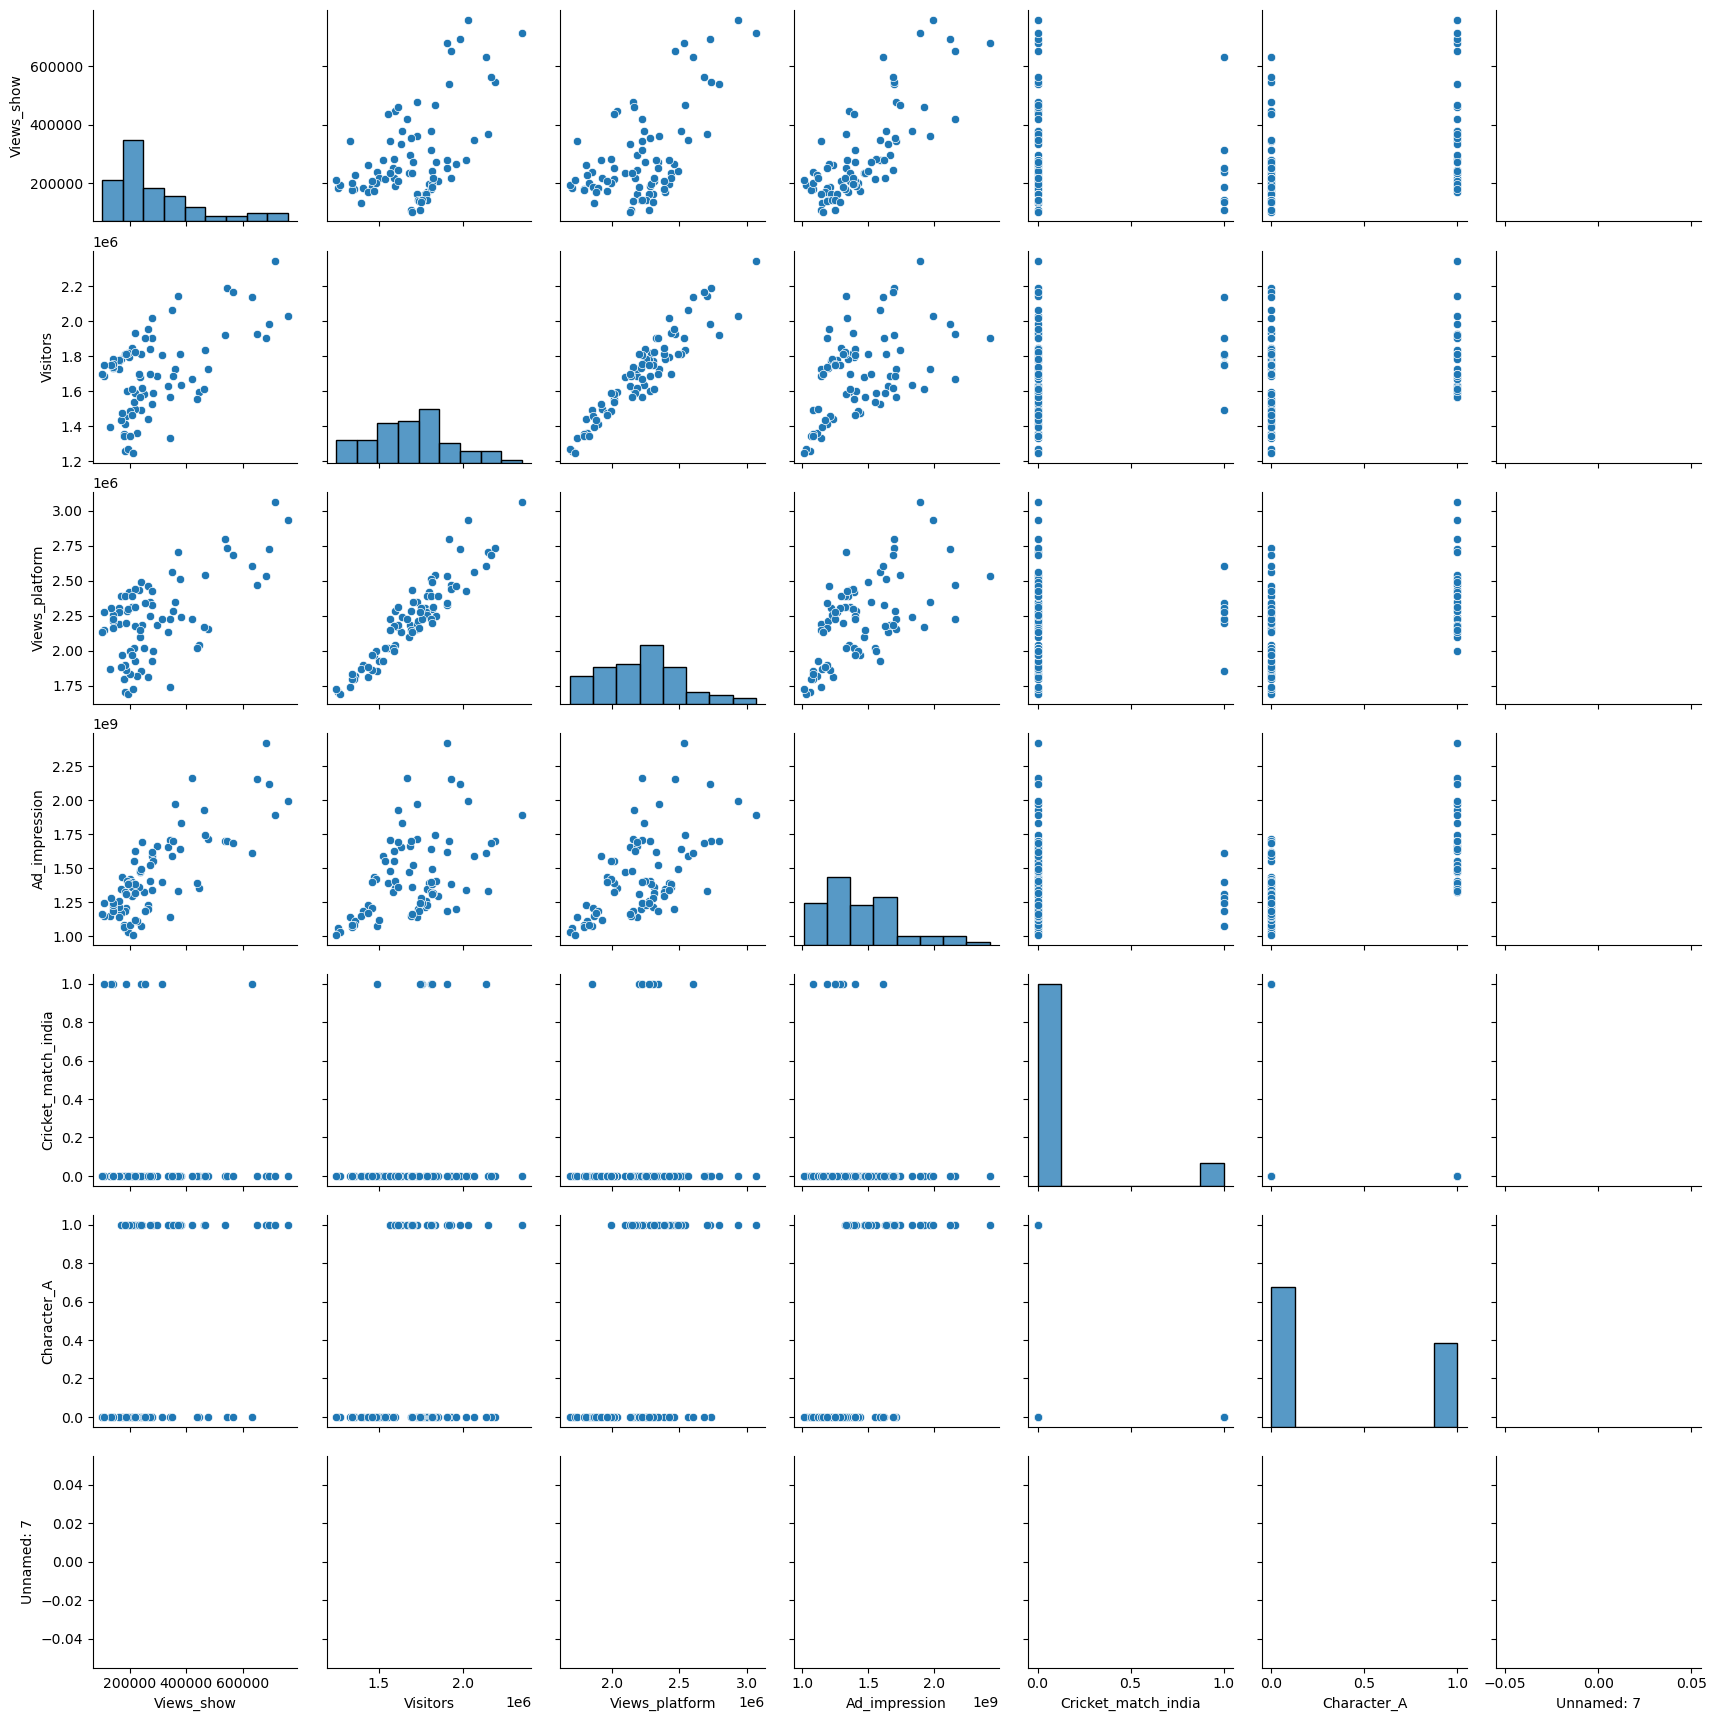

In [7]:
sns.pairplot(df)

In [14]:
df.drop('Unnamed: 7', inplace=True, axis=1)
df['Date'] = pd.to_datetime(df['Date'])

<Axes: xlabel='Character_A', ylabel='Views_show'>

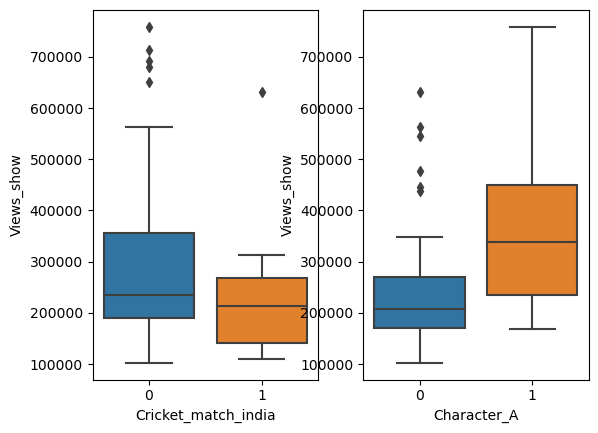

In [12]:
plt.subplot(1,2,1)
sns.boxplot(x='Cricket_match_india', y='Views_show', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Character_A', y='Views_show', data=df)

In [15]:
df.head()

Date  Views_show  Visitors  Views_platform  Ad_impression   
0 2017-03-01      183738   1260228         1706478     1060860448  \
1 2017-03-02      193763   1270561         1690727     1031846645   
2 2017-03-03      210479   1248183         1726157     1010867575   
3 2017-03-04      240061   1492913         1855353     1079194579   
4 2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  
0                    0            0  
1                    0            0  
2                    0            0  
3                    1            0  
4                    0            0

<Axes: >

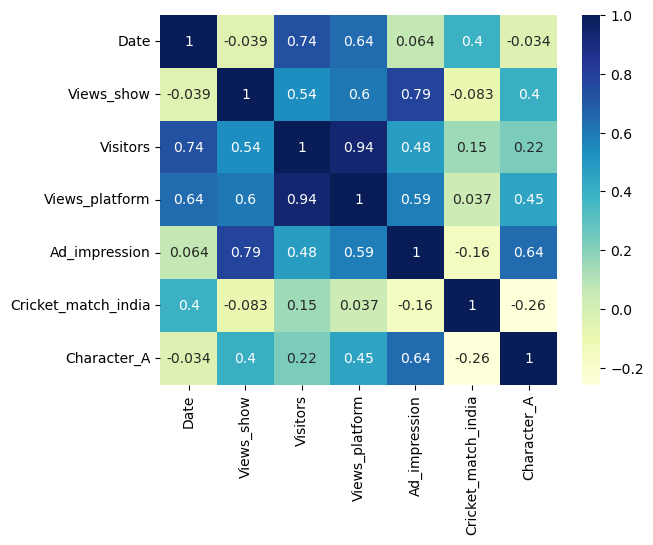

In [19]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [23]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)
print(df_train.shape, df_test.shape)

(56, 7) (24, 7)


In [25]:
df_train.describe()

Date     Views_show      Visitors   
count                             56      56.000000  5.600000e+01  \
mean   2017-04-09 09:25:42.857142784  265618.303571  1.691389e+06   
min              2017-03-01 00:00:00  102520.000000  1.248183e+06   
25%              2017-03-18 18:00:00  179934.750000  1.521733e+06   
50%              2017-04-08 00:00:00  226631.000000  1.697616e+06   
75%              2017-04-28 12:00:00  318862.000000  1.810934e+06   
max              2017-05-19 00:00:00  712778.000000  2.344650e+06   
std                              NaN  134081.073463  2.379970e+05   

       Views_platform  Ad_impression  Cricket_match_india  Character_A  
count    5.600000e+01   5.600000e+01            56.000000    56.000000  
mean     2.196274e+06   1.413853e+09             0.125000     0.339286  
min      1.690727e+06   1.010868e+09             0.000000     0.000000  
25%      1.990312e+06   1.189304e+09             0.000000     0.000000  
50%      2.194446e+06   1.344494e+09             0.000000     0.000000  
75%      2.357399e+06   1.625236e+09             0.000000     1.000000  
max      3.064422e+06   2.424203e+09             1.000000     1.000000  
std      2.835863e+05   2.945837e+08             0.333712     0.477752

In [26]:
num_cols = ['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [27]:
df_train.describe()

Date  Views_show   Visitors  Views_platform   
count                             56   56.000000  56.000000       56.000000  \
mean   2017-04-09 09:25:42.857142784    0.267261   0.404213        0.368020   
min              2017-03-01 00:00:00    0.000000   0.000000        0.000000   
25%              2017-03-18 18:00:00    0.126856   0.249483        0.218087   
50%              2017-04-08 00:00:00    0.203375   0.409891        0.366689   
75%              2017-04-28 12:00:00    0.354509   0.513240        0.485313   
max              2017-05-19 00:00:00    1.000000   1.000000        1.000000   
std                              NaN    0.219712   0.217058        0.206441   

       Ad_impression  Cricket_match_india  Character_A  
count      56.000000            56.000000    56.000000  
mean        0.285131             0.125000     0.339286  
min         0.000000             0.000000     0.000000  
25%         0.126252             0.000000     0.000000  
50%         0.236056             0.000000     0.000000  
75%         0.434694             0.000000     1.000000  
max         1.000000             1.000000     1.000000  
std         0.208432             0.333712     0.477752

In [28]:
df_test.describe()

Date     Views_show      Visitors  Views_platform   
count                   24      24.000000  2.400000e+01    2.400000e+01  \
mean   2017-04-09 18:00:00  346566.041667  1.716978e+06    2.283363e+06   
min    2017-03-06 00:00:00  143112.000000  1.330689e+06    1.742540e+06   
25%    2017-03-25 12:00:00  206807.500000  1.564804e+06    2.115635e+06   
50%    2017-04-10 12:00:00  264862.000000  1.755849e+06    2.280221e+06   
75%    2017-04-29 18:00:00  461714.500000  1.859908e+06    2.463679e+06   
max    2017-05-14 00:00:00  758631.000000  2.135756e+06    2.933930e+06   
std                    NaN  186181.788535  2.181856e+05    3.061233e+05   

       Ad_impression  Cricket_match_india  Character_A  
count   2.400000e+01            24.000000    24.000000  
mean    1.508922e+09             0.041667     0.458333  
min     1.113812e+09             0.000000     0.000000  
25%     1.306839e+09             0.000000     0.000000  
50%     1.403018e+09             0.000000     0.000000  
75%     1.702555e+09             0.000000     1.000000  
max     2.158027e+09             1.000000     1.000000  
std     3.025837e+08             0.204124     0.508977

In [29]:
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [30]:
df_test.describe()

Date  Views_show   Visitors  Views_platform   
count                   24   24.000000  24.000000       24.000000  \
mean   2017-04-09 18:00:00    0.399906   0.427550        0.431417   
min    2017-03-06 00:00:00    0.066516   0.075247        0.037718   
25%    2017-03-25 12:00:00    0.170891   0.288765        0.309318   
50%    2017-04-10 12:00:00    0.266022   0.463002        0.429130   
75%    2017-04-29 18:00:00    0.588594   0.557905        0.562681   
max    2017-05-14 00:00:00    1.075137   0.809484        0.905007   
std                    NaN    0.305087   0.198990        0.222847   

       Ad_impression  Cricket_match_india  Character_A  
count      24.000000            24.000000    24.000000  
mean        0.352396             0.041667     0.458333  
min         0.072838             0.000000     0.000000  
25%         0.209413             0.000000     0.000000  
50%         0.277464             0.000000     0.000000  
75%         0.489401             0.000000     1.000000  
max         0.811668             1.000000     1.000000  
std         0.214092             0.204124     0.508977

In [31]:
y_train = df_train.pop('Views_show')
X_train = df_train
y_test = df_test.pop('Views_show')
X_test = df_test

In [32]:
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(56,) (56, 6) (24,) (24, 6)


In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()
X = X_train.drop('Date', axis=1)
X_train_sm = sm.add_constant(X)
lr_model = lm.fit(X_train_sm, y_train)
rfe = RFE(lm)
rfe.fit(X_train_sm, y_train)

RFE(estimator=LinearRegression())

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Date', False, 4),
 ('Visitors', True, 1),
 ('Views_platform', False, 3),
 ('Ad_impression', True, 1),
 ('Cricket_match_india', False, 2),
 ('Character_A', True, 1)]

In [52]:
cols = X_train.columns[ rfe.support_]
cols

Index(['Visitors', 'Ad_impression', 'Character_A'], dtype='object')

In [53]:
rejected_cols = X_train.columns[ ~rfe.support_]
rejected_cols

Index(['Date', 'Views_platform', 'Cricket_match_india'], dtype='object')

In [54]:
X = X_train.drop(rejected_cols, axis=True)
X = X_train.drop('Date', axis=1)
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm)
lr_model = lm.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     19.99
Date:                Tue, 23 May 2023   Prob (F-statistic):           6.76e-11
Time:                        01:55:04   Log-Likelihood:                 36.658
No. Observations:                  56   AIC:                            -61.32
Df Residuals:                      50   BIC:                            -49.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0212      0.040     -0.530      0.598      -0.101       0.059
Visitors                0.2138      0.368      0.582      0.564      -0.525       0.952
Views_platform          0.0452      0.407      0.111      0.912      -0.772       0.862
Ad_impression           0.7805      0.123      6.335      0.000       0.533       1.028
Cricket_match_india    -0.0718      0.058     -1.245      0.219      -0.188       0.044
Character_A            -0.0831      0.060     -1.395      0.169      -0.203       0.037
==============================================================================
Omnibus:                        5.258   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.958
Skew:                           0.728   Prob(JB):                       0.0838
Kurtosis:                       2.939   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1       Views_platform  91.71
0             Visitors  84.03
2        Ad_impression   5.63
4          Character_A   3.80
3  Cricket_match_india   1.28